In [1]:
import pandas as pd
import numpy as np


## Unbalanced Data

In [2]:
#Select feature to predict on

feature = 'rating_count'
data_1_2_3 = 2

In [3]:
#Choosing file path


if data_1_2_3 ==1:
    file_location = 'D:\\Victor Yotov\\ITU\\3rd Semester\\Research Project\\data\\Movies_Dataset\\1_Data_Movies.csv'
elif data_1_2_3 == 2:
    file_location = 'D:\\Victor Yotov\\ITU\\3rd Semester\\Research Project\\data\\Movies_Dataset\\2_Movies_WithAwards.csv'
elif data_1_2_3 == 3:
    file_location = 'D:\\Victor Yotov\\ITU\\3rd Semester\\Research Project\\data\\Movies_Dataset\\3_USA_Movies_WithAwards_inflation.csv'
else:
    raise ValueError('Wrong INTEGER provided.') 
    
data = pd.read_csv(file_location)

data.shape

(3708, 142)

In [4]:
file_location

'D:\\Victor Yotov\\ITU\\3rd Semester\\Research Project\\data\\Movies_Dataset\\2_Movies_WithAwards.csv'

In [5]:
data.head(5)

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,Winner_Actor,Winner_Actor in a Leading Role,Winner_Actor in a Supporting Role,Winner_Actress,Winner_Actress in a Leading Role,Winner_Actress in a Supporting Role,Winner_Assistant Director,Winner_Directing,Winner_Directing (Comedy Picture),Winner_Directing (Dramatic Picture)
0,nm0000485,Fritz Lang,tt0017136,Metropolis (1927) - IMDb,418,263,98,8.3,114917,5 March 1927 (Denmark) See more »,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,nm0000122,Charles Chaplin,tt0027977,Les temps modernes (1936) - IMDb,213,119,96,8.6,147990,24 September 1936 (France) See more »,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,nm0281808,Victor Fleming,tt0032138,"Óz, a csodák csodája (1939) - IMDb",540,213,100,8.1,299644,21 March 1940 (Hungary) See more »,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,nm0002030,George Cukor,tt0032138,"Óz, a csodák csodája (1939) - IMDb",540,213,100,8.1,299644,21 March 1940 (Hungary) See more »,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,nm0003506,James Mangold,tt0035423,Kate & Leopold (2001) - IMDb,317,124,44,6.4,65765,25 December 2001 (USA) See more »,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
### Coold code

# # Quartile cut into 4 different buckets

# cutIntoQuartiles = pd.qcut(data['rating_value'].to_list(), q=4)

# # # Print the quartile range for visuals
# # print(cutIntoQuartiles.categories)

# # # Rename the categories to poor , average,  good , excellent
# # cutIntoQuartiles.categories = ['poor','average','good','excellent']

# # # Add the data to the dataframe
# # movies_data['calc_score'] = cutIntoQuartiles

In [7]:
def quantile_feature(data, string):
    q1 = data[string].quantile(.25)
    q2 = data[string].quantile(.50)
    q3 = data[string].quantile(.75)
    q4 =  data[string].quantile(1)
    
    
#     q1 = (data.loc[:,string].quantile(.25))
#     q2 = (data.loc[:,string].quantile(.50))
#     q3 = (data.loc[:,string].quantile(.75))
#     q4 = (data.loc[:,string].quantile(1))
    return q1, q2, q3, q4


def success_measure_chained(score):
    
    if score >= 0 and score <= q1:
        return 'Terrible'
    elif score >q1 and score <=q2:
        return 'Poor'
    elif score >q2 and score <= q3:
        return 'Average'
    elif score > q3 and score <=q4:
        return 'Excellent'
    else:
        return 'Error_Score' 
    
    
def create_Movie_class(df,feature_name):
    feature = feature_name
#     q1,q2,q3,q4 = quantile_feature(df,feature_name)
    df['Movie_class'] = df[feature].apply(success_measure_chained)
    
    return df

In [8]:
def dummy_male(string):
    if string =='Male':
        return 1
    else:
        return 0
    
    
    
def dummy_female(string):
    if string =='Female':
        return 1
    else:
        return 0
    

    

In [9]:
#If 1 ---- MovieDataset 1
if data_1_2_3 == 1:
    data =  data.drop(columns=['director_ids', 'director_names','movie_id','title','primaryProfession', 'knownForTitles','date_published', 'release_date'])
    
elif data_1_2_3 == 2 or data_1_2_3 ==3:
    data = data.drop(columns=['director_ids', 'director_names', 'movie_id', 'title',
       'release_date', 'Film', 'Name'])

    
# data.drop(columns=['director_ids', 'director_names','movie_id','title','primaryProfession', 'knownForTitles','date_published', 'release_date'],inplace=True)
# data = data.drop(columns=['director_ids', 'director_names', 'movie_id', 'title',
#        'release_date', 'Film', 'Name'])

In [10]:
# feature = 'rating_value'
q1,q2,q3,q4 = quantile_feature(data,feature)
data = create_Movie_class(data,feature)

        
data['Gender_MALE'] = data.Gender.apply(dummy_male)
data['Gender_FEMALE'] = data.Gender.apply(dummy_female)




In [11]:
data['Movie_class'].value_counts()

Average      927
Excellent    927
Poor         927
Terrible     927
Name: Movie_class, dtype: int64

In [12]:
data.review_count_user = data.review_count_user.astype(int)
data.review_count_critic = data.review_count_critic.astype(int)
data.rating_value = data.rating_value.astype(float)
data.rating_count = data.rating_count.astype(int)
data.movie_year = data.movie_year.astype(int)
data.birthYear = data.birthYear.astype(int)


if data_1_2_3 == 2 or data_1_2_3 ==3:
    data.metascore = data.metascore.astype(int)

In [13]:
data.drop(columns=[feature,'Gender'],inplace=True)

In [14]:
# for i in data.columns.values:
#     print(i)

In [15]:
# data.Gender = data.Gender.map({'Male': 1, 'Female':0})

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from string import ascii_uppercase
import seaborn as sn

def report_accuracy_RF(dataframe, predicted_feature, numberEstimators=100):
    #Splitting X and y
    X = dataframe[dataframe.columns.difference([predicted_feature],sort=False)]
    y = dataframe[predicted_feature]
    
    #Initialize Random Forest
    rnd_forest = RandomForestClassifier(n_estimators=numberEstimators, class_weight='balanced')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    rnd_forest.fit(X_train,y_train.values.ravel())
    score = rnd_forest.score(X_test,y_test)
    
    return score, rnd_forest,X, y ,X_train, X_test, y_train, y_test
    

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [18]:
def create_cnf_matrix(y_test, X_test, model):
    
    y_true = y_test.copy()
    y_predict = model.predict(X_test)
    
### C_0_0 = TP - male being classified as a male
### C_0_1 = Males being identified as femals
### C_1_0 = Female being identified as male
### C_1_1 = TN female identified as female  

    #define the order of classes appearing in the matrix
    labels = ['Terrible','Poor','Average','Excellent']
    cnf_matrix = confusion_matrix(y_true, y_predict,  labels=labels)
    
    return cnf_matrix
    

In [19]:
def calculate_confusion_matrix_metrics(confusion_matrix):
    #source:
    #https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py
    
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    
    return TN, FP, FN, TP

In [20]:
def print_accuracy_feature_importance(score, X, model):
    
    print(f'The accuracy of the model is equal to {round(score * 100,2)} %')
    print()
    print(X.columns)
    print()
    print(model.feature_importances_)
    

In [21]:
def customized_classification_report(y_true,y_pred, AUCROC ):
    cols_to_use_classification_report = ['Terrible','Poor','Average','Excellent','accuracy']
    reportGBClassification = classification_report(y_true,
                                                   y_pred,
                                                   labels = cols_to_use_classification_report[:-1],
                                                   output_dict=True)
    
    reportDF = pd.DataFrame(reportGBClassification, columns = cols_to_use_classification_report)[0:3]#.round(2)
    
    accuracyRow = reportDF['accuracy'].unique().tolist()
    
    reportDF.drop(columns='accuracy',inplace= True)

    reportDF.loc[len(reportDF)] = 4 * accuracyRow
    reportDF.loc[len(reportDF)] = 4 * [AUCROC] #[round(AUCROC,2)]

    reportDF = reportDF.rename(index = {3:'accuracy',4:'AUC ROC'})
    return reportDF

In [22]:
score, rnd_forest,X, y ,X_train, X_test, y_train, y_test = report_accuracy_RF(data,"Movie_class")
print_accuracy_feature_importance(score,X, rnd_forest)
# print("===============================================\n")
# print()
# cnf_matrix = create_cnf_matrix(y_test,X_test,rnd_forest)
# print(cnf_matrix)
# print("===============================================\n")
# TN, FP, FN, TP = calculate_confusion_matrix_metrics(cnf_matrix)
# print('TN = ',TN)
# print('FP = ',FP)
# print('FN = ',FN)
# print('TP = ',TP)

The accuracy of the model is equal to 76.28 %

Index(['review_count_user', 'review_count_critic', 'metascore', 'rating_value',
       'runtime', 'movie_year', 'opening_weekend_value', 'open_wk_cur_AUD',
       'open_wk_cur_CAD', 'open_wk_cur_DEM',
       ...
       'Winner_Actor in a Supporting Role', 'Winner_Actress',
       'Winner_Actress in a Leading Role',
       'Winner_Actress in a Supporting Role', 'Winner_Assistant Director',
       'Winner_Directing', 'Winner_Directing (Comedy Picture)',
       'Winner_Directing (Dramatic Picture)', 'Gender_MALE', 'Gender_FEMALE'],
      dtype='object', length=135)

[1.64912342e-01 1.21921599e-01 4.13615003e-02 6.16845025e-02
 3.69244746e-02 3.72446215e-02 7.13828795e-02 0.00000000e+00
 1.56677276e-05 7.90780410e-05 5.15601902e-03 1.23996373e-04
 0.00000000e+00 0.00000000e+00 1.52927915e-05 5.50649687e-03
 9.96226601e-02 0.00000000e+00 5.84462080e-02 7.77917455e-05
 4.07064059e-04 2.79969559e-03 1.09878056e-03 6.77335721e-05
 4.82549814e-03 2

Confusion matrix, without normalization
[[160  25   0   0]
 [ 22 134  29   1]
 [  0  35 126  25]
 [  0   2  37 146]]


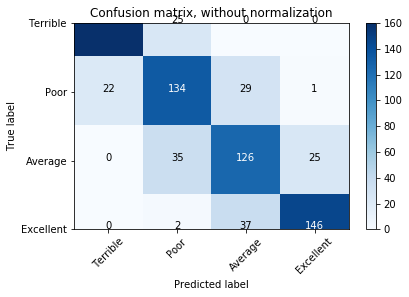

In [23]:
y_predict= rnd_forest.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_predict,labels=['Terrible','Poor','Average','Excellent'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Terrible','Poor','Average','Excellent'],
                      title='Confusion matrix, without normalization')

In [24]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_predict,labels=['Terrible','Poor','Average','Excellent']))

              precision    recall  f1-score   support

    Terrible       0.88      0.86      0.87       185
        Poor       0.68      0.72      0.70       186
     Average       0.66      0.68      0.67       186
   Excellent       0.85      0.79      0.82       185

    accuracy                           0.76       742
   macro avg       0.77      0.76      0.76       742
weighted avg       0.77      0.76      0.76       742



In [25]:
from sklearn.metrics import roc_auc_score


y_prob = rnd_forest.predict_proba(X_test)
ovo_macro_roc_auc = roc_auc_score(y_test, y_prob, average="macro", multi_class = "ovo")
print( "\nArea Under the Curve - ROC (OVO , Macro) : ",round(ovo_macro_roc_auc,3))


Area Under the Curve - ROC (OVO , Macro) :  0.936


In [26]:
rnd_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
customized_classification_report(y_test,y_predict, ovo_macro_roc_auc )


,Terrible,Poor,Average,Excellent
precision,0.879121,0.683673,0.656250,0.848837
recall,0.864865,0.720430,0.677419,0.789189
f1-score,0.871935,0.701571,0.666667,0.817927
accuracy,0.762803,0.762803,0.762803,0.762803
AUC ROC,0.936364,0.936364,0.936364,0.936364


In [28]:
data.shape

(3708, 136)

### Unbalanced Without Gender

In [29]:
data2 = data.copy()


data2.drop(columns =['Gender_MALE','Gender_FEMALE'],inplace=True)

In [30]:
data2.shape

(3708, 134)

In [31]:
score2, rnd_forest2,X2, y2 ,X_train2, X_test2, y_train2, y_test2 = report_accuracy_RF(data2,"Movie_class")
print_accuracy_feature_importance(score2,X2, rnd_forest2)
# print("===============================================\n")
# print()
# cnf_matrix2 = create_cnf_matrix(y_test2,X_test2,rnd_forest2)
# print(cnf_matrix2)
# print("===============================================\n")
# TN2, FP2, FN2, TP2 = calculate_confusion_matrix_metrics(cnf_matrix2)
# print('TN = ',TN2)
# print('FP = ',FP2)
# print('FN = ',FN2)
# print('TP = ',TP2)

The accuracy of the model is equal to 76.15 %

Index(['review_count_user', 'review_count_critic', 'metascore', 'rating_value',
       'runtime', 'movie_year', 'opening_weekend_value', 'open_wk_cur_AUD',
       'open_wk_cur_CAD', 'open_wk_cur_DEM',
       ...
       'Winner_Actor', 'Winner_Actor in a Leading Role',
       'Winner_Actor in a Supporting Role', 'Winner_Actress',
       'Winner_Actress in a Leading Role',
       'Winner_Actress in a Supporting Role', 'Winner_Assistant Director',
       'Winner_Directing', 'Winner_Directing (Comedy Picture)',
       'Winner_Directing (Dramatic Picture)'],
      dtype='object', length=133)

[1.59e-01 1.17e-01 4.29e-02 6.19e-02 4.01e-02 3.86e-02 7.23e-02 0.00e+00
 8.44e-05 3.80e-05 5.08e-03 1.26e-04 0.00e+00 0.00e+00 0.00e+00 5.60e-03
 1.01e-01 0.00e+00 5.64e-02 1.04e-04 2.95e-04 1.86e-03 9.89e-04 9.43e-05
 5.15e-03 2.65e-03 2.97e-03 2.03e-04 3.96e-04 1.29e-04 7.65e-04 8.52e-04
 1.46e-04 2.07e-03 5.95e-04 0.00e+00 5.93e-04 7.80e-05 6.98e-04 4.

Confusion matrix, without normalization
[[162  23   0   0]
 [ 23 128  34   1]
 [  0  34 129  23]
 [  0   2  37 146]]


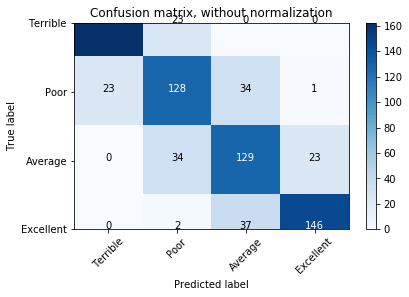

In [32]:

y_predict2= rnd_forest2.predict(X_test2)

cnf_matrix = confusion_matrix(y_test2, y_predict2,labels=['Terrible','Poor','Average','Excellent'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Terrible','Poor','Average','Excellent'],
                      title='Confusion matrix, without normalization')

In [33]:



print(classification_report(y_test2,y_predict2,labels=['Terrible','Poor','Average','Excellent']))

              precision    recall  f1-score   support

    Terrible       0.88      0.88      0.88       185
        Poor       0.68      0.69      0.69       186
     Average       0.65      0.69      0.67       186
   Excellent       0.86      0.79      0.82       185

    accuracy                           0.76       742
   macro avg       0.77      0.76      0.76       742
weighted avg       0.77      0.76      0.76       742



In [34]:
from sklearn.metrics import roc_auc_score


y_prob2 = rnd_forest2.predict_proba(X_test2)
ovo_macro_roc_auc2 = roc_auc_score(y_test2, y_prob2, average="macro", multi_class = "ovo")
print( "\nArea Under the Curve - ROC (OVO , Macro) : ",round(ovo_macro_roc_auc2,3))


Area Under the Curve - ROC (OVO , Macro) :  0.935


In [35]:
rnd_forest2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
customized_classification_report(y_test2,y_predict2, ovo_macro_roc_auc2 )

,Terrible,Poor,Average,Excellent
precision,0.875676,0.684492,0.645000,0.858824
recall,0.875676,0.688172,0.693548,0.789189
f1-score,0.875676,0.686327,0.668394,0.822535
accuracy,0.761456,0.761456,0.761456,0.761456
AUC ROC,0.935116,0.935116,0.935116,0.935116


### Balanced on Gender

In [37]:
data3 = pd.read_csv(file_location)

In [38]:
def balance_gender(dataframe):
    female_list_unique_directors = dataframe[(dataframe['Gender'] == 'Female')].director_ids.unique().tolist()
    
    unique_male_directors = dataframe[(dataframe['Gender'] == 'Male')].director_ids.unique().tolist()
    
    male_list_unique_directors = list(np.random.choice(unique_male_directors, replace = False, size = len(female_list_unique_directors)))
    
    total_list_unique_directors = female_list_unique_directors + male_list_unique_directors

    dataframe = dataframe[dataframe['director_ids'].isin(total_list_unique_directors)]

    return dataframe

In [39]:
data3.Gender.value_counts()

Male      3199
Female     509
Name: Gender, dtype: int64

In [40]:
balanced_data = balance_gender(data3)

if data_1_2_3 == 1:
    balanced_data = balanced_data.drop(columns=['director_ids', 'director_names','movie_id','title','primaryProfession', 'knownForTitles','date_published', 'release_date'])

elif data_1_2_3 == 2 or data_1_2_3 ==3:
    balanced_data = balanced_data.drop(columns=['director_ids', 'director_names', 'movie_id', 'title',
       'release_date', 'Film', 'Name'])

# balanced_data = balanced_data.drop(columns=['director_ids', 'director_names','movie_id','title','primaryProfession', 'knownForTitles','date_published', 'release_date'])
# balanced_data = balanced_data.drop(columns=['director_ids', 'director_names', 'movie_id', 'title',
#        'release_date', 'Film', 'Name'])



balanced_data.review_count_user = balanced_data.review_count_user.astype(int)
balanced_data.review_count_critic = balanced_data.review_count_critic.astype(int)
balanced_data.rating_value = balanced_data.rating_value.astype(float)
balanced_data.rating_count = balanced_data.rating_count.astype(int)
balanced_data.movie_year = balanced_data.movie_year.astype(int)
balanced_data.birthYear = balanced_data.birthYear.astype(int)

if data_1_2_3 == 2 or data_1_2_3 == 3:
    balanced_data.metascore = balanced_data.metascore.astype(int)


In [41]:
balanced_data.shape

(1134, 135)

In [42]:
balanced_data.Gender.value_counts()

Male      625
Female    509
Name: Gender, dtype: int64

In [43]:
q1,q2,q3,q4 = quantile_feature(balanced_data,feature)
balanced_data = create_Movie_class(balanced_data,feature)

balanced_data['Gender_MALE'] = balanced_data.Gender.apply(dummy_male)
balanced_data['Gender_FEMALE'] = balanced_data.Gender.apply(dummy_female)


balanced_data = balanced_data.drop(columns=[feature,'Gender'])

In [44]:
balanced_data['Movie_class'].value_counts()

Excellent    284
Terrible     284
Average      283
Poor         283
Name: Movie_class, dtype: int64

In [45]:
score3, rnd_forest3,X3, y3 ,X_train3, X_test3, y_train3, y_test3 = report_accuracy_RF(balanced_data,"Movie_class")

print(f"The accuracy of the model is {score3}.")
print()
print(f'The input features included are {X3.columns} ')
print()
print(f'The corresponding feature importance is{rnd_forest3.feature_importances_}')

The accuracy of the model is 0.7268722466960352.

The input features included are Index(['review_count_user', 'review_count_critic', 'metascore', 'rating_value',
       'runtime', 'movie_year', 'opening_weekend_value', 'open_wk_cur_AUD',
       'open_wk_cur_CAD', 'open_wk_cur_DEM',
       ...
       'Winner_Actor in a Supporting Role', 'Winner_Actress',
       'Winner_Actress in a Leading Role',
       'Winner_Actress in a Supporting Role', 'Winner_Assistant Director',
       'Winner_Directing', 'Winner_Directing (Comedy Picture)',
       'Winner_Directing (Dramatic Picture)', 'Gender_MALE', 'Gender_FEMALE'],
      dtype='object', length=135) 

The corresponding feature importance is[1.49e-01 1.14e-01 4.50e-02 5.63e-02 3.77e-02 3.97e-02 8.06e-02 0.00e+00
 2.91e-04 0.00e+00 5.19e-03 7.98e-05 0.00e+00 0.00e+00 0.00e+00 5.00e-03
 8.80e-02 0.00e+00 5.46e-02 1.13e-04 7.06e-04 2.43e-03 1.19e-03 0.00e+00
 5.74e-03 2.59e-03 3.00e-03 1.45e-05 7.75e-04 3.98e-05 1.24e-03 2.52e-04
 3.89e-05 2.43e-

In [46]:
# y_true3 = y_test3.copy()
y_predict3 = rnd_forest3.predict(X_test3)


from sklearn.metrics import classification_report


print(classification_report(y_test3,y_predict3,labels=['Terrible','Poor','Average','Excellent']))

              precision    recall  f1-score   support

    Terrible       0.78      0.88      0.83        57
        Poor       0.66      0.59      0.62        56
     Average       0.62      0.63      0.63        57
   Excellent       0.84      0.81      0.82        57

    accuracy                           0.73       227
   macro avg       0.72      0.73      0.72       227
weighted avg       0.72      0.73      0.72       227



In [47]:
y_prob3 = rnd_forest3.predict_proba(X_test3)
ovo_macro_roc_auc3 = roc_auc_score(y_test3, y_prob3, average="macro", multi_class = "ovo")
print( "\nArea Under the Curve - ROC (OVO , Macro) : ",round(ovo_macro_roc_auc3,2))


Area Under the Curve - ROC (OVO , Macro) :  0.92


In [48]:
rnd_forest3

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
customized_classification_report(y_test3,y_predict3, ovo_macro_roc_auc3 )

,Terrible,Poor,Average,Excellent
precision,0.781250,0.660000,0.620690,0.836364
recall,0.877193,0.589286,0.631579,0.807018
f1-score,0.826446,0.622642,0.626087,0.821429
accuracy,0.726872,0.726872,0.726872,0.726872
AUC ROC,0.915015,0.915015,0.915015,0.915015


### Summary tables

##### Unbalanced WITH Gender

In [50]:
customized_classification_report(y_test,y_predict, ovo_macro_roc_auc )


,Terrible,Poor,Average,Excellent
precision,0.879121,0.683673,0.656250,0.848837
recall,0.864865,0.720430,0.677419,0.789189
f1-score,0.871935,0.701571,0.666667,0.817927
accuracy,0.762803,0.762803,0.762803,0.762803
AUC ROC,0.936364,0.936364,0.936364,0.936364


##### Unbalanced WITHOUT Gender

In [51]:
customized_classification_report(y_test2,y_predict2, ovo_macro_roc_auc2 )

,Terrible,Poor,Average,Excellent
precision,0.875676,0.684492,0.645000,0.858824
recall,0.875676,0.688172,0.693548,0.789189
f1-score,0.875676,0.686327,0.668394,0.822535
accuracy,0.761456,0.761456,0.761456,0.761456
AUC ROC,0.935116,0.935116,0.935116,0.935116


##### Balanced on Gender

In [52]:
customized_classification_report(y_test3,y_predict3, ovo_macro_roc_auc3 )

,Terrible,Poor,Average,Excellent
precision,0.781250,0.660000,0.620690,0.836364
recall,0.877193,0.589286,0.631579,0.807018
f1-score,0.826446,0.622642,0.626087,0.821429
accuracy,0.726872,0.726872,0.726872,0.726872
AUC ROC,0.915015,0.915015,0.915015,0.915015


In [53]:
# break

In [54]:
y_test.value_counts()

Average      186
Poor         186
Excellent    185
Terrible     185
Name: Movie_class, dtype: int64

### Shap 

In [55]:
import shap
shap.initjs()


In [56]:
# explainer = shap.TreeExplainer(rnd_fores)
explainer = shap.TreeExplainer(rnd_forest)
shap_values = explainer.shap_values(X_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [57]:
explainer.expected_value

array([0.25, 0.25, 0.25, 0.25])

In [58]:
rnd_forest.classes_

array(['Average', 'Excellent', 'Poor', 'Terrible'], dtype=object)

In [59]:
shap_values[0].shape, y_test.shape, X_test.shape

((742, 135), (742,), (742, 135))

In [60]:
shap_values[0].shape,shap_values[1].shape,shap_values[2].shape,shap_values[3].shape

((742, 135), (742, 135), (742, 135), (742, 135))

In [61]:
y_test

3033     Terrible
3632     Terrible
3349     Terrible
1995    Excellent
1874     Terrible
          ...    
2165    Excellent
3703     Terrible
3053      Average
935      Terrible
398       Average
Name: Movie_class, Length: 742, dtype: object

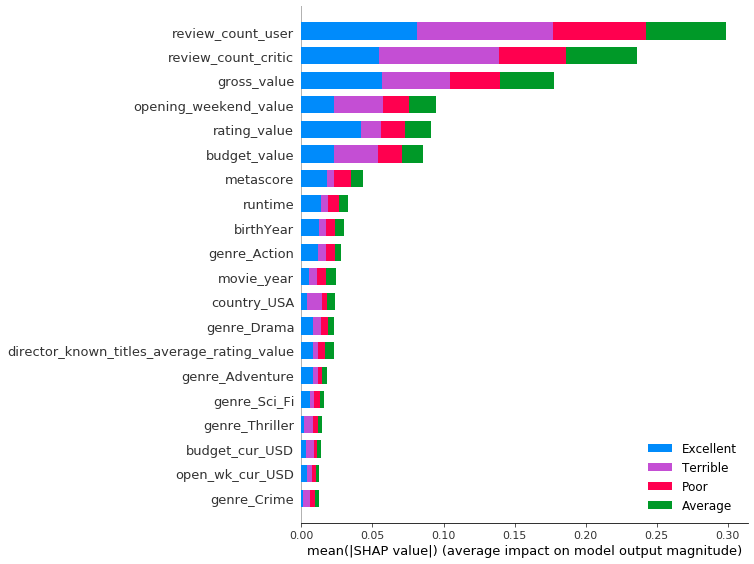

In [62]:
shap.summary_plot(shap_values, X,class_names=rnd_forest.classes_,show=False)
import matplotlib.pyplot as pl
# pl.savefig("Movies_Dataset_2_Global_Feature_Importance.png",bbox_inches = 'tight')

In [63]:
class_inds

NameError: name 'class_inds' is not defined

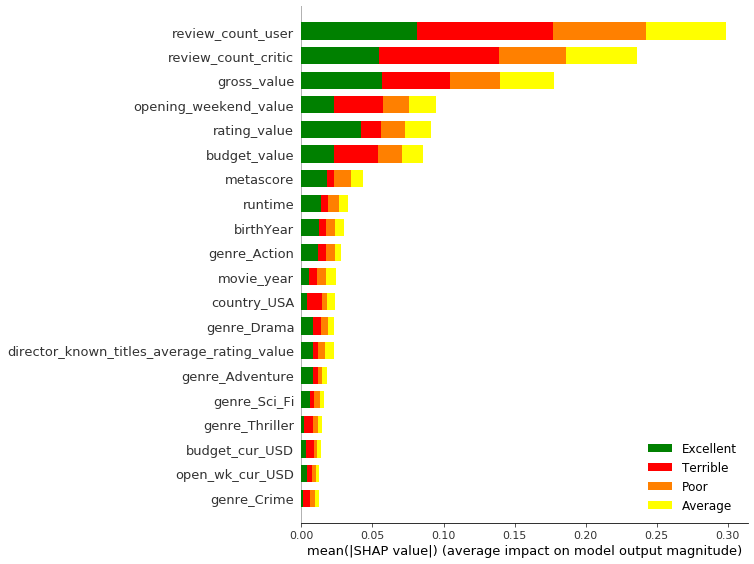

In [64]:
from matplotlib import colors as plt_colors
classes = rnd_forest.classes_

# set RGB tuple per class
colors = [(1, 1, 0), (0, 0.5, 0), (1, 0.5, 0),(1,0,0)]

# get class ordering from shap values
class_inds = np.argsort([-np.abs(shap_values[i]).mean() for i in range(len(shap_values))])

# create listed colormap
cmap = plt_colors.ListedColormap(np.array(colors)[class_inds])

shap.initjs()


# shap.summary_plot(shap_values, X,show=False)
shap.summary_plot(shap_values, 
                  features = X ,
                  class_names= rnd_forest.classes_ ,
#                   title = 'Summary Plot for Random forest',
                  color=cmap,
                  show = False
#                   color = ['red','blue','green','yellow'],
                  )

# plt.savefig("EntireDirector_Global_Feature_Importance.png",bbox_inches = 'tight')

plt.savefig("Movies_Dataset_2_Global_Feature_Importance_COLORS.png",bbox_inches = 'tight')
plt.show()

In [ ]:
break

In [ ]:
# for i in range(4):
#     shap.summary_plot(shap_values[i], X_test) 

In [ ]:
import matplotlib.pyplot as pl
shap.summary_plot(shap_values[0], X_test,show=False)
pl.savefig("Data2_summary_plot_Class_Avg.png",bbox_inches = 'tight')

In [ ]:
shap.summary_plot(shap_values[1], X_test,show=False)
pl.savefig("Data2_summary_plot_Class_Excellent.png",bbox_inches = 'tight')

In [ ]:
shap.summary_plot(shap_values[2], X_test,show=False)
pl.savefig("Data2_summary_plot_Class_Poor.png",bbox_inches = 'tight')

In [ ]:
shap.summary_plot(shap_values[3], X_test,show=False)
pl.savefig("Data2_summary_plot_Class_Terrible.png",bbox_inches = 'tight')

In [ ]:
shap.dependence_plot("review_count_user", shap_values[0], X_test, interaction_index="Gender_MALE") 

In [ ]:
# # (sum of SHAP value magnitudes over the validation dataset)
# top_inds = np.argsort(-np.sum(np.abs(shap_values[0]), 0))

# # make SHAP plots of the three most important features
# for i in range(20):
# #     shap.dependence_plot(top_inds[i], shap_values[0], X_test,interaction_index="Gender_FEMALE")
#     shap.dependence_plot("Gender_FEMALE", shap_values[3], X_test,interaction_index=top_inds[i])

In [ ]:
# # make SHAP plots of the three most important features
# for i in range(20):
# #     shap.dependence_plot(top_inds[i], shap_values[0], X_test,interaction_index="Gender_FEMALE")
#     shap.dependence_plot("Gender_MALE", shap_values[3], X_test,interaction_index=top_inds[i])

In [ ]:
choosen_instance = X_test.loc[[1744]]

In [ ]:
# choosen_instance = X_test.loc[[583]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()


shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance,show=False,matplotlib=True)\
    .savefig("Data2_FORCE_plot_Class_Average.png",bbox_inches = 'tight')



In [ ]:
# choosen_instance = X_test.loc[[583]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()


shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance,show=False,matplotlib=True)\
    .savefig("Data2_FORCE_plot_Class_Excellent.png",bbox_inches = 'tight')

In [ ]:
# choosen_instance = X_test.loc[[583]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()


shap.force_plot(explainer.expected_value[2], shap_values[2], choosen_instance,show=False,matplotlib=True)\
    .savefig("Data2_FORCE_plot_Class_Poor.png",bbox_inches = 'tight')

In [ ]:
# choosen_instance = X_test.loc[[583]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()


shap.force_plot(explainer.expected_value[3], shap_values[3], choosen_instance,show=False,matplotlib=True)\
    .savefig("Data2_FORCE_plot_Class_Terrible.png",bbox_inches = 'tight')

In [ ]:
break

### Feature Importance from SKlearn

In [ ]:
feature_importances = dict(zip(X_test.columns, rnd_forest.feature_importances_))

In [ ]:
b = pd.DataFrame(list(feature_importances.items()), columns=['Column_name','feature_importance'])

In [ ]:
b.to_excel('Data2_feature_importance.xlsx')

In [ ]:
c = b.sort_values(by=['feature_importance'], ascending=False)

In [ ]:
c

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(rnd_forest, X_test, y_test, n_repeats=10, random_state=0)

In [ ]:
result.get('importances_mean').shape

In [ ]:
feature_importances2 = dict(zip(X.columns,result.importances_mean))
d = pd.DataFrame(list(feature_importances2.items()), columns=['Column_name','feature_importance'])
e = d.sort_values(by=['feature_importance'], ascending=False)

In [ ]:
e.to_excel('Feature_importances_Data2_permutation_importance_test_data.xlsx')

In [ ]:
for i in zip(X_test.columns, rnd_forest.feature_importances_):
    print(i)